In [210]:
import pandas as pd 
from sklearn.datasets import fetch_california_housing
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor

from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [211]:
df = 'C:/Users/Alexandra/Documents/Ironhack/Week7/Project/parkinsons/ML-Project-Eleven/data/telemonitoring/parkinsons_updrs.data'
park_data = pd.read_csv(df)
park_data.dropna(how='all', inplace=True)
park_data.drop_duplicates(inplace=True)
park_data

,subject#,age,sex,test_time,motor_UPDRS,total_UPDRS,Jitter(%),Jitter(Abs),Jitter:RAP,Jitter:PPQ5,...,Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,Shimmer:APQ11,Shimmer:DDA,NHR,HNR,RPDE,DFA,PPE
0,1,72,0,5.6431,28.199,34.398,0.00662,0.000034,0.00401,0.00317,...,0.230,0.01438,0.01309,0.01662,0.04314,0.014290,21.640,0.41888,0.54842,0.16006
1,1,72,0,12.6660,28.447,34.894,0.00300,0.000017,0.00132,0.00150,...,0.179,0.00994,0.01072,0.01689,0.02982,0.011112,27.183,0.43493,0.56477,0.10810
2,1,72,0,19.6810,28.695,35.389,0.00481,0.000025,0.00205,0.00208,...,0.181,0.00734,0.00844,0.01458,0.02202,0.020220,23.047,0.46222,0.54405,0.21014
3,1,72,0,25.6470,28.905,35.810,0.00528,0.000027,0.00191,0.00264,...,0.327,0.01106,0.01265,0.01963,0.03317,0.027837,24.445,0.48730,0.57794,0.33277
4,1,72,0,33.6420,29.187,36.375,0.00335,0.000020,0.00093,0.00130,...,0.176,0.00679,0.00929,0.01819,0.02036,0.011625,26.126,0.47188,0.56122,0.19361
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5870,42,61,0,142.7900,22.485,33.485,0.00406,0.000031,0.00167,0.00168,...,0.160,0.00973,0.01133,0.01549,0.02920,0.025137,22.369,0.64215,0.55314,0.21367
5871,42,61,0,149.8400,21.988,32.988,0.00297,0.000025,0.00119,0.00147,...,0.215,0.01052,0.01277,0.01904,0.03157,0.011927,22.886,0.52598,0.56518,0.12621
5872,42,61,0,156.8200,21.495,32.495,0.00349,0.000025,0.00152,0.00187,...,0.244,0.01371,0.01456,0.01877,0.04112,0.017701,25.065,0.47792,0.57888,0.14157
5873,42,61,0,163.7300,21.007,32.007,0.00281,0.000020,0.00128,0.00151,...,0.131,0.00693,0.00870,0.01307,0.02078,0.007984,24.422,0.56865,0.56327,0.14204


In [212]:
park_data.isnull().sum()

subject#         0
age              0
sex              0
test_time        0
motor_UPDRS      0
total_UPDRS      0
Jitter(%)        0
Jitter(Abs)      0
Jitter:RAP       0
Jitter:PPQ5      0
Jitter:DDP       0
Shimmer          0
Shimmer(dB)      0
Shimmer:APQ3     0
Shimmer:APQ5     0
Shimmer:APQ11    0
Shimmer:DDA      0
NHR              0
HNR              0
RPDE             0
DFA              0
PPE              0
dtype: int64

In [213]:
park_data.columns

Index(['subject#', 'age', 'sex', 'test_time', 'motor_UPDRS', 'total_UPDRS',
       'Jitter(%)', 'Jitter(Abs)', 'Jitter:RAP', 'Jitter:PPQ5', 'Jitter:DDP',
       'Shimmer', 'Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5',
       'Shimmer:APQ11', 'Shimmer:DDA', 'NHR', 'HNR', 'RPDE', 'DFA', 'PPE'],
      dtype='object')

In [214]:
park_data['subject#'].nunique()

42

In [215]:
park_data['age'].min()

np.int64(36)

In [216]:
park_data['age'].max()

np.int64(85)

Pie Chart for the sex distribution

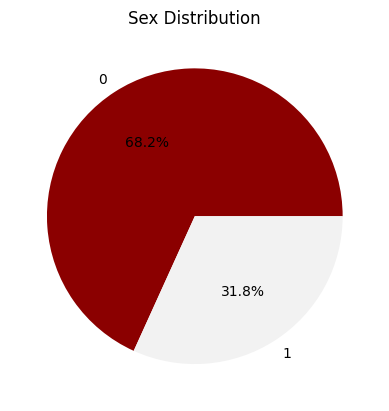

In [217]:
age_counts = park_data['sex'].value_counts()

plt.figure()
age_counts.plot(
    kind='pie',
    autopct='%1.1f%%',
    colors=['#8B0000', '#f2f2f2']  # red and near-white
)

plt.ylabel('')  # removes the y-label
plt.title('Sex Distribution')
plt.show()

Histogram for the Age Distribution

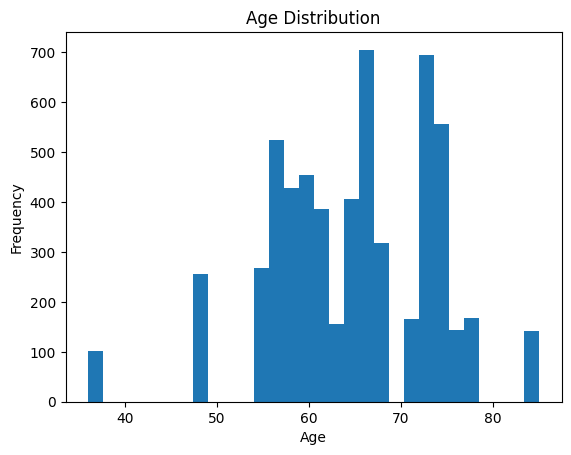

In [218]:
plt.figure()
plt.hist(park_data['age'], bins=30)  # increase bins
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Age Distribution')
plt.show()

## Data Preparation

Begin feature engineering to enhance your model's predictive capabilities.


In [219]:
features = park_data.drop(columns = ["total_UPDRS"])
target = park_data["total_UPDRS"]

In [220]:
X = features
y = target

Division between Train and Test

In [221]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.20, random_state=0)

In [222]:
X_train.head()

,subject#,age,sex,test_time,motor_UPDRS,Jitter(%),Jitter(Abs),Jitter:RAP,Jitter:PPQ5,Jitter:DDP,...,Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,Shimmer:APQ11,Shimmer:DDA,NHR,HNR,RPDE,DFA,PPE
598,5,75,0,56.428,31.000,0.00493,0.000041,0.00214,0.00278,0.00643,...,0.368,0.02268,0.02892,0.04076,0.06803,0.026969,17.304,0.59679,0.66536,0.23970
4511,33,66,1,30.401,24.057,0.00330,0.000010,0.00158,0.00153,0.00475,...,0.229,0.01200,0.01291,0.01825,0.03600,0.021930,20.407,0.50141,0.52669,0.23438
5284,39,66,0,61.510,29.056,0.02251,0.000219,0.01262,0.00902,0.03785,...,0.538,0.02656,0.03037,0.03621,0.07967,0.129720,16.021,0.72480,0.62491,0.35762
1431,10,58,0,52.356,12.000,0.01150,0.000105,0.00462,0.00581,0.01387,...,0.404,0.01567,0.01755,0.02216,0.04702,0.031666,20.433,0.55557,0.67689,0.31261
3582,26,49,0,161.870,22.893,0.00603,0.000045,0.00309,0.00307,0.00928,...,0.936,0.06262,0.06365,0.07062,0.18786,0.033073,16.860,0.56374,0.70793,0.24890


In [223]:
y_train.head()

598     40.840
4511    28.322
5284    39.408
1431    19.000
3582    28.155
Name: total_UPDRS, dtype: float64

In [224]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor

The normalization of the data

In [225]:
normalizer = MinMaxScaler() # x_new = (x - min(x)) / (max(x) -min(x))

normalizer.fit(X_train)

,"feature_range feature_range: tuple (min, max), default=(0, 1)Desired range of transformed data.","(0, ...)"
,"copy copy: bool, default=TrueSet to False to perform inplace row normalization and avoid acopy (if the input is already a numpy array).",True
,"clip clip: bool, default=FalseSet to True to clip transformed values of held-out data toprovided `feature_range`.Since this parameter will clip values, `inverse_transform` may notbe able to restore the original data... note:: Setting `clip=True` does not prevent feature drift (a distribution shift between training and test data). The transformed values are clipped to the `feature_range`, which helps avoid unintended behavior in models sensitive to out-of-range inputs (e.g. linear models). Use with care, as clipping can distort the distribution of test data... versionadded:: 0.24",False


In [226]:
scaler = StandardScaler() # x_new = (x - mean(x)) / std(x)

scaler.fit(X_train)

,"copy copy: bool, default=TrueIf False, try to avoid a copy and do inplace scaling instead.This is not guaranteed to always work inplace; e.g. if the data isnot a NumPy array or scipy.sparse CSR matrix, a copy may still bereturned.",True
,"with_mean with_mean: bool, default=TrueIf True, center the data before scaling.This does not work (and will raise an exception) when attempted onsparse matrices, because centering them entails building a densematrix which in common use cases is likely to be too large to fit inmemory.",True
,"with_std with_std: bool, default=TrueIf True, scale the data to unit variance (or equivalently,unit standard deviation).",True


In [227]:
X_train_norm_np = normalizer.transform(X_train)
X_test_norm_np = normalizer.transform(X_test)

In [228]:
X_train_norm_df = pd.DataFrame(X_train_norm_np, columns = X_train.columns, index=X_train.index)
X_train_norm_df.head()

,subject#,age,sex,test_time,motor_UPDRS,Jitter(%),Jitter(Abs),Jitter:RAP,Jitter:PPQ5,Jitter:DDP,...,Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,Shimmer:APQ11,Shimmer:DDA,NHR,HNR,RPDE,DFA,PPE
598,0.097561,0.795918,0.0,0.276177,0.753113,0.041502,0.086457,0.031638,0.033994,0.031751,...,0.175926,0.130821,0.163436,0.140199,0.130779,0.036800,0.429787,0.568548,0.430424,0.306844
4511,0.780488,0.612245,1.0,0.157739,0.551711,0.025003,0.017955,0.021849,0.015912,0.021963,...,0.104424,0.064510,0.066453,0.057735,0.064489,0.029850,0.515800,0.446898,0.035982,0.299346
5284,0.926829,0.612245,0.0,0.299303,0.696722,0.219455,0.489015,0.214823,0.124259,0.214798,...,0.263374,0.154911,0.172220,0.123530,0.154870,0.178509,0.394223,0.731816,0.315366,0.473037
1431,0.219512,0.448980,0.0,0.257647,0.201962,0.108007,0.232057,0.074987,0.077824,0.075095,...,0.194444,0.087297,0.094560,0.072059,0.087297,0.043278,0.516521,0.515975,0.463221,0.409601
3582,0.609756,0.265306,0.0,0.755998,0.517946,0.052637,0.096517,0.048243,0.038189,0.048354,...,0.468107,0.378803,0.373819,0.249588,0.378782,0.045218,0.417480,0.526395,0.551513,0.319810


In [229]:
X_test_norm_df = pd.DataFrame(X_test_norm_np, columns = X_test.columns, index=X_test.index)
X_test_norm_df.head()

,subject#,age,sex,test_time,motor_UPDRS,Jitter(%),Jitter(Abs),Jitter:RAP,Jitter:PPQ5,Jitter:DDP,...,Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,Shimmer:APQ11,Shimmer:DDA,NHR,HNR,RPDE,DFA,PPE
5588,0.975610,0.653061,1.0,0.053453,0.713517,0.072173,0.106713,0.070267,0.050629,0.070259,...,0.126543,0.077487,0.083111,0.099718,0.077466,0.038975,0.501192,0.512072,0.529042,0.323404
4802,0.829268,0.714286,0.0,0.080475,0.902591,0.162263,0.228019,0.162559,0.136554,0.162540,...,0.313786,0.228052,0.282287,0.221819,0.228031,0.078127,0.320157,0.630878,0.670895,0.549664
3060,0.536585,0.469388,1.0,0.763006,0.221223,0.032392,0.043195,0.031987,0.027629,0.032100,...,0.092078,0.073761,0.068452,0.049346,0.073761,0.009661,0.557462,0.450022,0.509444,0.216165
4228,0.731707,0.795918,0.0,0.908169,0.409891,0.156595,0.244259,0.129348,0.116013,0.129391,...,0.437757,0.179685,0.307548,0.433015,0.179643,0.123151,0.311093,0.722951,0.674223,0.616313
5796,1.000000,0.510204,0.0,0.701209,0.491694,0.025205,0.059187,0.024122,0.023723,0.024177,...,0.060700,0.038619,0.053065,0.053559,0.038619,0.009804,0.621078,0.361393,0.281659,0.214375


In [230]:
X_train_standarized_np = scaler.transform(X_train)
X_test_standarized_np = scaler.transform(X_test)

X_train_standarized_df = pd.DataFrame(X_train_standarized_np, columns = X_train.columns, index=X_train.index)
X_test_standarized_df  = pd.DataFrame(X_test_standarized_np, columns = X_test.columns, index=X_test.index)

In [231]:
X_train_norm_df.describe()

,subject#,age,sex,test_time,motor_UPDRS,Jitter(%),Jitter(Abs),Jitter:RAP,Jitter:PPQ5,Jitter:DDP,...,Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,Shimmer:APQ11,Shimmer:DDA,NHR,HNR,RPDE,DFA,PPE
count,4700.000000,4700.000000,4700.000000,4700.000000,4700.000000,4700.000000,4700.000000,4700.000000,4700.000000,4700.000000,...,4700.000000,4700.000000,4700.000000,4700.000000,4700.000000,4700.000000,4700.000000,4700.000000,4700.000000,4700.000000
mean,0.500254,0.589049,0.321277,0.440908,0.472362,0.053569,0.094081,0.046211,0.040964,0.046264,...,0.146357,0.096350,0.110172,0.091366,0.096329,0.043597,0.550272,0.498396,0.396471,0.279280
std,0.303506,0.179098,0.467016,0.243473,0.236143,0.055479,0.081106,0.053862,0.052399,0.053856,...,0.117191,0.081190,0.100168,0.072256,0.081190,0.079857,0.118523,0.128366,0.202626,0.128891
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.219512,0.448980,0.000000,0.231381,0.288986,0.027837,0.045625,0.021849,0.020252,0.021890,...,0.077160,0.048041,0.053777,0.048174,0.048010,0.014857,0.487298,0.407133,0.233459,0.189810
50%,0.512195,0.591837,0.000000,0.435014,0.459292,0.041401,0.072901,0.033735,0.029799,0.033731,...,0.117284,0.075189,0.085019,0.074129,0.075148,0.025205,0.556852,0.498992,0.367633,0.259566
75%,0.780488,0.734694,1.000000,0.649333,0.656314,0.060229,0.115216,0.051739,0.043686,0.051748,...,0.174897,0.117922,0.132299,0.110754,0.117881,0.042998,0.627134,0.590552,0.562137,0.343593
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [232]:
X_train_standarized_df.describe()

,subject#,age,sex,test_time,motor_UPDRS,Jitter(%),Jitter(Abs),Jitter:RAP,Jitter:PPQ5,Jitter:DDP,...,Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,Shimmer:APQ11,Shimmer:DDA,NHR,HNR,RPDE,DFA,PPE
count,4.700000e+03,4.700000e+03,4.700000e+03,4.700000e+03,4.700000e+03,4.700000e+03,4.700000e+03,4.700000e+03,4.700000e+03,4.700000e+03,...,4.700000e+03,4.700000e+03,4.700000e+03,4.700000e+03,4.700000e+03,4.700000e+03,4.700000e+03,4.700000e+03,4.700000e+03,4.700000e+03
mean,-2.872407e-17,-5.019153e-16,6.047172e-18,2.199659e-16,1.721554e-16,-8.919579e-17,-1.058255e-16,-6.047172e-17,5.442455e-17,3.023586e-18,...,-7.823529e-17,-1.670531e-16,-2.868627e-16,-2.582332e-16,1.511793e-17,1.375732e-16,-5.880875e-16,-1.093026e-15,-1.473998e-15,-1.634626e-16
std,1.000106e+00,1.000106e+00,1.000106e+00,1.000106e+00,1.000106e+00,1.000106e+00,1.000106e+00,1.000106e+00,1.000106e+00,1.000106e+00,...,1.000106e+00,1.000106e+00,1.000106e+00,1.000106e+00,1.000106e+00,1.000106e+00,1.000106e+00,1.000106e+00,1.000106e+00,1.000106e+00
min,-1.648428e+00,-3.289334e+00,-6.880074e-01,-1.811105e+00,-2.000534e+00,-9.656833e-01,-1.160102e+00,-8.580351e-01,-7.818449e-01,-8.591257e-01,...,-1.249011e+00,-1.186850e+00,-1.099987e+00,-1.264603e+00,-1.186588e+00,-5.460010e-01,-4.643246e+00,-3.883039e+00,-1.956877e+00,-2.167021e+00
25%,-9.250957e-01,-7.821680e-01,-6.880074e-01,-8.606686e-01,-7.766281e-01,-4.638722e-01,-5.975034e-01,-4.523387e-01,-3.953155e-01,-4.526183e-01,...,-5.905227e-01,-5.950760e-01,-5.630624e-01,-5.978239e-01,-5.951983e-01,-3.599335e-01,-5.313816e-01,-7.110393e-01,-8.045828e-01,-6.942303e-01
50%,3.934722e-02,1.556674e-02,-6.880074e-01,-2.420807e-02,-5.535384e-02,-2.193534e-01,-2.611682e-01,-2.316399e-01,-2.130946e-01,-2.327311e-01,...,-2.481089e-01,-2.606617e-01,-2.511289e-01,-2.385742e-01,-2.609123e-01,-2.303456e-01,5.552644e-02,4.644955e-03,-1.423381e-01,-1.529664e-01
75%,9.234199e-01,8.133015e-01,1.453473e+00,8.561419e-01,7.790687e-01,1.200534e-01,2.606138e-01,1.026540e-01,5.195412e-02,1.018328e-01,...,2.435621e-01,2.657204e-01,2.209294e-01,2.683558e-01,2.654687e-01,-7.510212e-03,6.485743e-01,7.179940e-01,8.176852e-01,4.990217e-01
max,1.646752e+00,2.294809e+00,1.453473e+00,2.296568e+00,2.234640e+00,1.706120e+01,1.117075e+01,1.770988e+01,1.830442e+01,1.771093e+01,...,7.284993e+00,1.113122e+01,8.884303e+00,1.257652e+01,1.113145e+01,1.197769e+01,3.794850e+00,3.908029e+00,2.978861e+00,5.592282e+00


Linear Regression

In [233]:
lin_reg = LinearRegression()

In [234]:
lin_reg2 = LinearRegression()

In [235]:
lin_reg.fit(X_train_norm_df, y_train)

,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


In [236]:
lin_reg2.fit(X_train_standarized_df, y_train)

,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


In [237]:
import pickle

with open("linear_model_normalized.pkl", "wb") as file:
    pickle.dump(lin_reg, file)

with open("min_max_scaler.pkl", "wb") as file:
    pickle.dump(normalizer, file)

In [238]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, root_mean_squared_error

In [239]:
y_pred_test = lin_reg.predict(X_test_norm_df)

print(f"MAE {mean_absolute_error(y_pred_test, y_test): .2f}") # mean(abs(error)) = mean(abs(y_test - y_pred_test))
print(f"MSE {mean_squared_error(y_pred_test, y_test): .2f}") # mean(error**2) = mean((y_test - y_pred_test)**2)
print(f"RMSE, {root_mean_squared_error(y_pred_test, y_test): .2f}") # sqrt( mean( (y_test - y_pred_test)**2 ) ) # b0, b1, b2...
print(f"R2 score, {lin_reg.score(X_test_norm_df, y_test): .2f}") # r2_score

MAE  2.42
MSE  10.69
RMSE,  3.27
R2 score,  0.90


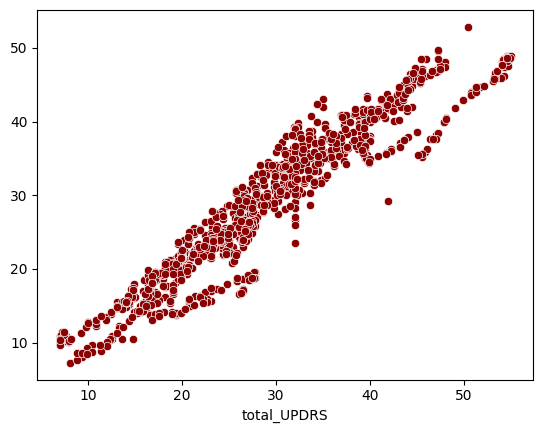

In [240]:
sns.scatterplot(x=y_test, y=y_pred_test, color='#8B0000'); # y_pred_test = y_test;  y_pred_test = 0 + y_test; y_pred_test = 0 + 1 * y_test

In [241]:
y_pred_test2 = lin_reg2.predict(X_test_standarized_df)

#lin_reg.score(X_test_norm_df, y_test)

print(f"MAE {mean_absolute_error(y_pred_test2, y_test): .2f}") # mean(abs(error)) = mean(abs(y_test - y_pred_test))
print(f"MSE {mean_squared_error(y_pred_test2, y_test): .2f}")
print(f"RMSE, {root_mean_squared_error(y_pred_test2, y_test): .2f}") # sqrt( mean( (y_test - y_pred_test)^2 ) ) # b0, b1, b2...
print(f"R2 score, {lin_reg2.score(X_test_standarized_df, y_test): .2f}")

MAE  2.42
MSE  10.69
RMSE,  3.27
R2 score,  0.90


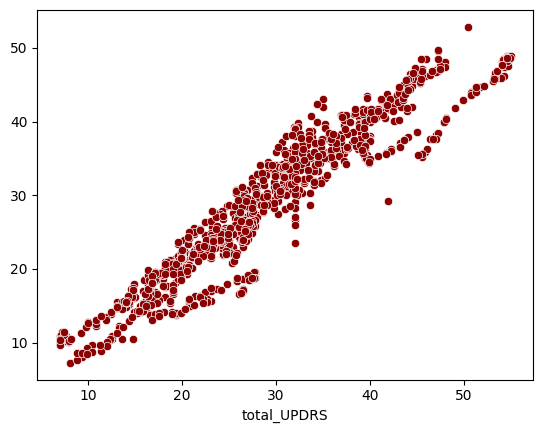

In [242]:
sns.scatterplot(x=y_test, y=y_pred_test2, color='#8B0000');

In [243]:
results = pd.DataFrame({"y_test": y_test, "lin_reg": y_pred_test, "lin_reg2": y_pred_test2})
results

,y_test,lin_reg,lin_reg2
5588,37.635,38.399602,38.399602
4802,54.153,48.433288,48.433288
3060,26.443,17.222209,17.222209
4228,23.237,25.698706,25.698706
5796,32.988,31.665646,31.665646
...,...,...,...
4698,54.550,48.631117,48.631117
2328,34.807,37.177859,37.177859
5696,43.104,44.685349,44.685349
862,39.136,36.077335,36.077335


In [244]:
results_melted = results.melt(id_vars="y_test")
results_melted

,y_test,variable,value
0,37.635,lin_reg,38.399602
1,54.153,lin_reg,48.433288
2,26.443,lin_reg,17.222209
3,23.237,lin_reg,25.698706
4,32.988,lin_reg,31.665646
...,...,...,...
2345,54.550,lin_reg2,48.631117
2346,34.807,lin_reg2,37.177859
2347,43.104,lin_reg2,44.685349
2348,39.136,lin_reg2,36.077335


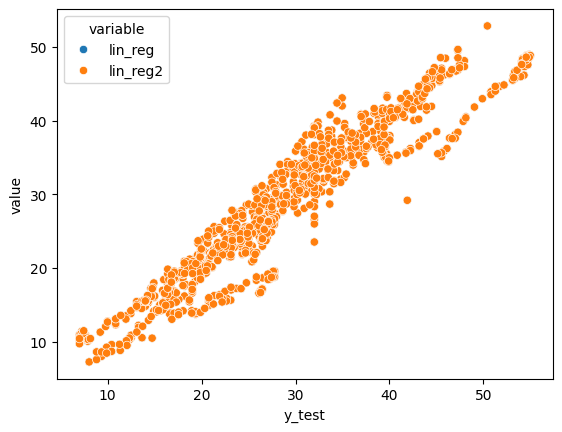

In [245]:
sns.scatterplot(data=results_melted, y="value", x="y_test", hue="variable");

In [246]:
lin_reg_coef = {feature : coef for feature, coef in zip(X_train_norm_df.columns, lin_reg.coef_)}
lin_reg_coef

{'subject#': np.float64(2.021275170626105),
 'age': np.float64(3.7443339466804417),
 'sex': np.float64(-1.8265475192321206),
 'test_time': np.float64(0.5758802660870577),
 'motor_UPDRS': np.float64(41.66040152241846),
 'Jitter(%)': np.float64(-44.298484420791496),
 'Jitter(Abs)': np.float64(9.019842038094772),
 'Jitter:RAP': np.float64(348.0601181632545),
 'Jitter:PPQ5': np.float64(7.660934918132491),
 'Jitter:DDP': np.float64(-317.1114897635973),
 'Shimmer': np.float64(-14.829219227985726),
 'Shimmer(dB)': np.float64(4.108654140606054),
 'Shimmer:APQ3': np.float64(-1381.0700676897743),
 'Shimmer:APQ5': np.float64(19.90168634816241),
 'Shimmer:APQ11': np.float64(-12.103024567038505),
 'Shimmer:DDA': np.float64(1377.3867035364635),
 'NHR': np.float64(-3.095938767352699),
 'HNR': np.float64(-2.7812376812709974),
 'RPDE': np.float64(2.072013879964099),
 'DFA': np.float64(-1.5790706946079303),
 'PPE': np.float64(-2.270968717037219)}

In [247]:
lin_reg.intercept_

np.float64(8.7839444228573)

### Cross-Validation
### Model Standard k-Fold

In [248]:
from sklearn.model_selection import KFold, cross_val_score
from sklearn.linear_model import LinearRegression
import numpy as np

# Assume X and y are your features and target (total UPDRS)
# X: pandas DataFrame of voice features
# y: pandas Series or array of total UPDRS

lin_reg = LinearRegression()

# Standard k-Fold CV
k = 5  # Number of folds
kf = KFold(n_splits=k, shuffle=True, random_state=42)  # shuffle recommended

# Compute cross-validated R^2 scores
scores = cross_val_score(lin_reg, X, y, cv=kf, scoring='r2')

print(f"R2 scores for each fold: {scores}")
print(f"Mean R2: {np.mean(scores):.3f}")
print(f"Standard deviation: {np.std(scores):.3f}")


R2 scores for each fold: [0.91381079 0.90167049 0.91176976 0.91351376 0.90381669]
Mean R2: 0.909
Standard deviation: 0.005


Using 5-fold cross-validation, the linear regression model predicting total UPDRS from voice features achieved a mean R² of 0.91 (SD = 0.005), indicating that over 90% of the variability in symptom severity is captured by the model and that performance is stable across different patient subsets.